In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.cos(x)

In [16]:
x = np.linspace(-4, 4)

In [17]:
x

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

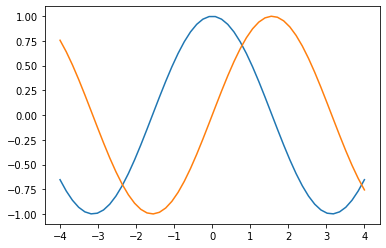

In [18]:
plt.plot(x, f(x))
plt.plot(x, np.sin(x))

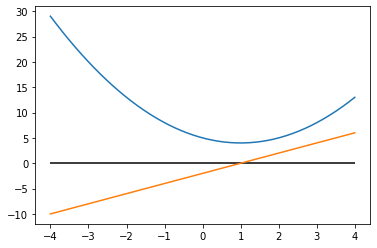

In [63]:
plt.plot(x, f(x))
plt.plot(x, f_diff(x))
plt.hlines(0, -4, 4)

In [62]:
def f(x):
    return (x-1)**2 + 4
    # return np.cos(x)

def f_diff(x):
    return 2 * (x-1)
    # return -np.sin(x)

In [53]:
dx = 0.1 * np.ones(50)

In [54]:
x + dx

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [55]:
y = (f(x+dx) - f(x)) / dx

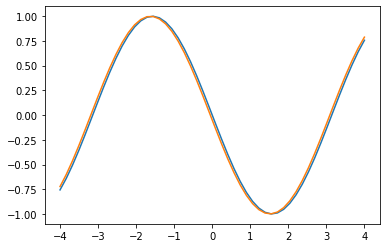

In [56]:
plt.plot(x, f_diff(x))
plt.plot(x, y)

In [52]:
y - f_diff(x)

array([ 3.28080418e-03,  3.85045652e-03,  4.31770058e-03,  4.67010932e-03,
        4.89830996e-03,  4.99623317e-03,  4.96127455e-03,  4.79436388e-03,
        4.49994037e-03,  4.08583464e-03,  3.56306040e-03,  2.94552157e-03,
        2.24964246e-03,  1.49393096e-03,  6.98486267e-04, -1.15535649e-04,
       -9.26484732e-04, -1.71279265e-03, -2.45354645e-03, -3.12904474e-03,
       -3.72132170e-03, -4.21462488e-03, -4.59583420e-03, -4.85481086e-03,
       -4.98466702e-03, -4.98194897e-03, -4.84672899e-03, -4.58260346e-03,
       -4.19659716e-03, -3.69897647e-03, -3.10297632e-03, -2.42444815e-03,
       -1.68143838e-03, -8.93708407e-04, -8.22089999e-05,  7.31476871e-04,
        1.52570809e-03,  2.27936096e-03,  2.97239103e-03,  3.58636618e-03,
        4.10495690e-03,  4.51437053e-03,  4.80371815e-03,  4.96530414e-03,
        4.99483090e-03,  4.89151313e-03,  4.65809870e-03,  4.30079560e-03,
        3.82910681e-03,  3.25557756e-03])

In [59]:
a = np.array([0, 1])
b = np.array([0.5, 0.5])
a * b

In [101]:
def stupid_random_search(num_guesses, f):
    w_random = np.random.uniform(-4, 4, size=num_guesses)
    output = f(w_random)
    return w_random[output.argmin()]

stupid_random_search(1000, f)

1.0051333997414194

In [100]:
def random_search(num_iterations, f):
    w_best = np.random.uniform(-4, 4)
    
    for i in range(num_iterations):
        w_new = w_best + np.random.normal(0, 0.01)
        if f(w_new) < f(w_best):
            w_best = w_new
            
    return w_best

random_search(1000, f)

0.9999677604237487

In [98]:
def gradient_descent_finite_differences(num_iterations, f, alpha=0.01, dw=0.0001):
    w = np.random.uniform(-4, 4)
    
    for i in range(num_iterations):
        w_diff = (f(w + dw) - f(w)) / dw
        
        w = w - alpha * w_diff
        
        alpha = alpha * 0.999
        
    return w

gradient_descent_finite_differences(1000, f)

0.9999436442076499

In [99]:
def gradient_descent(num_iterations, f, alpha=0.01):
    w = np.random.uniform(-4, 4)
    
    for i in range(num_iterations):
        w_diff = f_diff(w)
        
        w = w - alpha * w_diff
        
        alpha = alpha * 0.999
        
    return w

gradient_descent(1000, f)

0.9999911044352476

In [105]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms

In [106]:
train_loader = torch.utils.data.DataLoader(
    MNIST(root='~/data', train=True, download=True,
          transform=transforms.ToTensor()),
    batch_size=100, shuffle=True, pin_memory=True)